<a href="https://colab.research.google.com/github/AdamayB/Tensorflow_Zero_to_Mastery/blob/main/03_Intro_to_Computer_Vision_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to CNN and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as a camera of self-driving car.

## Get The Data
Using Food101 dataset. But only with pizza and stake images.

 https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



In [61]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping....*unzip noises

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-10-14 13:47:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  22.8MB/s    in 5.7s    

2023-10-14 13:47:37 (18.2 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect data
Visualizing many samples of data.

In [62]:
!ls pizza_steak

test  train


In [63]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [64]:
#  Counting number of files

import os
for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [65]:
# Get the classnames programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_name)

['pizza' 'steak']


## Visualize,Visualize,Visualize

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  # Target Directory
  target_folder=target_dir+target_class
  # Random images selected
  random_image = random.sample(os.listdir(target_folder),1)
  # Read and plot the image
  img=mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print("Image Shape:",img.shape)

  return img

Image Shape: (512, 512, 3)


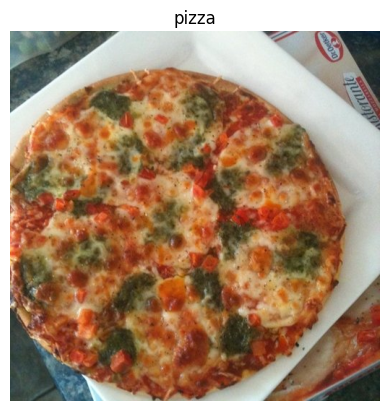

In [67]:
img= view_random_images(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [68]:
img

array([[[119, 145, 134],
        [120, 146, 135],
        [116, 143, 136],
        ...,
        [  6,  32,  49],
        [  5,  31,  48],
        [  4,  30,  47]],

       [[119, 145, 134],
        [121, 147, 138],
        [120, 147, 140],
        ...,
        [  5,  31,  48],
        [  3,  29,  46],
        [  3,  29,  46]],

       [[117, 145, 133],
        [121, 148, 139],
        [123, 150, 143],
        ...,
        [  7,  33,  50],
        [  5,  31,  48],
        [  4,  30,  47]],

       ...,

       [[ 53,  70,  60],
        [ 56,  73,  63],
        [ 59,  75,  65],
        ...,
        [ 45,  53,  38],
        [ 40,  48,  33],
        [ 34,  42,  27]],

       [[ 56,  72,  61],
        [ 58,  74,  63],
        [ 60,  76,  65],
        ...,
        [ 41,  50,  33],
        [ 36,  45,  28],
        [ 32,  41,  24]],

       [[ 55,  71,  60],
        [ 56,  72,  61],
        [ 57,  73,  62],
        ...,
        [ 34,  43,  26],
        [ 30,  39,  22],
        [ 25,  34,  17]]

In [69]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[119, 145, 134],
        [120, 146, 135],
        [116, 143, 136],
        ...,
        [  6,  32,  49],
        [  5,  31,  48],
        [  4,  30,  47]],

       [[119, 145, 134],
        [121, 147, 138],
        [120, 147, 140],
        ...,
        [  5,  31,  48],
        [  3,  29,  46],
        [  3,  29,  46]],

       [[117, 145, 133],
        [121, 148, 139],
        [123, 150, 143],
        ...,
        [  7,  33,  50],
        [  5,  31,  48],
        [  4,  30,  47]],

       ...,

       [[ 53,  70,  60],
        [ 56,  73,  63],
        [ 59,  75,  65],
        ...,
        [ 45,  53,  38],
        [ 40,  48,  33],
        [ 34,  42,  27]],

       [[ 56,  72,  61],
        [ 58,  74,  63],
        [ 60,  76,  65],
        ...,
        [ 41,  50,  33],
        [ 36,  45,  28],
        [ 32,  41,  24]],

       [[ 55,  71,  60],
        [ 56,  72,  61],
        [ 57,  73,  62],
        ...,
        [ 34,  43,  2

## Builing CNN

Steps:
* Load Images
* Preprocess our Images
* Buils a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Normalizing data
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Data path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data and make batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode = 'binary',
                                               seed=42)
# Builidng CNN

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation='relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile CNN
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.5310 - accuracy: 0.7313 - val_loss: 0.3911 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4128 - accuracy: 0.8307 - val_loss: 0.3577 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4171 - accuracy: 0.8180 - val_loss: 0.3284 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3742 - accuracy: 0.8373 - val_loss: 0.3528 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3428 - accuracy: 0.8580 - val_loss: 0.3134 - val_accuracy: 0.8620


Checking val_accuracy, we can clearly see, we have an 88% accuracy.

In [71]:
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_26 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_28 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                

## Using a previously built model.
https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [72]:


# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 107ms/step - loss: 1.3394 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [73]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 4)                 602116    
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 128ms/step - loss: 4.5740 - accuracy: 0.6133 - val_loss: 1.8881 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.7409 - accuracy: 0.6973 - val_loss: 0.4525 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.5195 - accuracy: 0.7627 - val_loss: 0.4978 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.6530 - accuracy: 0.7320 - val_loss: 0.4447 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5064 - accuracy: 0.7727 - val_loss: 0.4601 - val_accuracy: 0.7860


In [75]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential

* The ```2D``` means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

* ```filters``` - these are the number of "feature extractors" that will be moving over our images.

* ```kernel_size``` - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.

* ```stride``` - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.

* ```padding``` - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [76]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [78]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(255, 255),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(255, 255),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [79]:
model_4= tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation='relu',
           input_shape=(255,255,3)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Flatten(),
    #Conv2D()
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [80]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [81]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 93s 144ms/step - loss: 1.7106 - accuracy: 0.5913 - val_loss: 0.5588 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 8s 159ms/step - loss: 0.5128 - accuracy: 0.7513 - val_loss: 0.6179 - val_accuracy: 0.6720
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3377 - accuracy: 0.8627 - val_loss: 0.4918 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 8s 160ms/step - loss: 0.1668 - accuracy: 0.9433 - val_loss: 0.8080 - val_accuracy: 0.7060
Epoch 5/5
47/47 [==============================] - 7s 155ms/step - loss: 0.0696 - accuracy: 0.9813 - val_loss: 0.7539 - val_accuracy: 0.7180


In [82]:
history_4.history

{'loss': [1.7106260061264038,
  0.5127743482589722,
  0.3376677334308624,
  0.1667962372303009,
  0.0695796087384224],
 'accuracy': [0.5913333296775818,
  0.7513333559036255,
  0.862666666507721,
  0.9433333277702332,
  0.981333315372467],
 'val_loss': [0.5587703585624695,
  0.6178528666496277,
  0.4917604327201843,
  0.8079962730407715,
  0.7538741230964661],
 'val_accuracy': [0.7279999852180481,
  0.671999990940094,
  0.8080000281333923,
  0.7059999704360962,
  0.7179999947547913]}

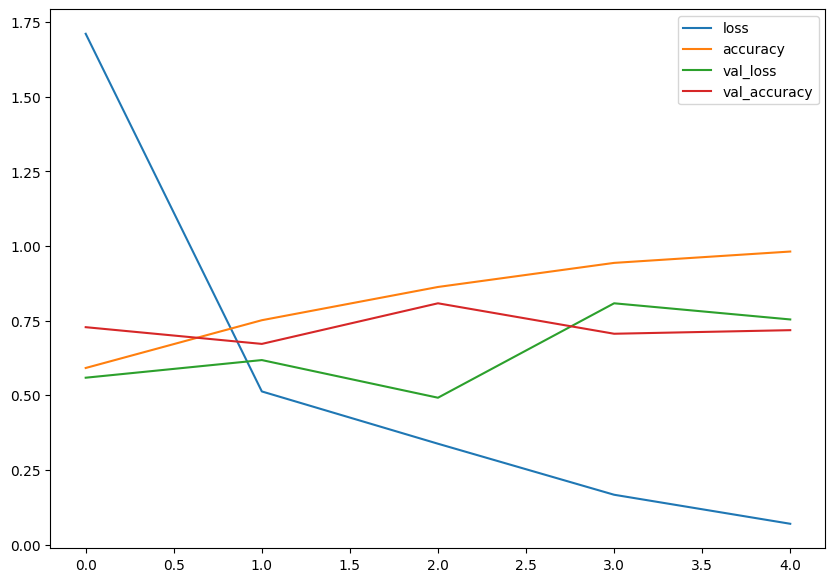

In [83]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [84]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

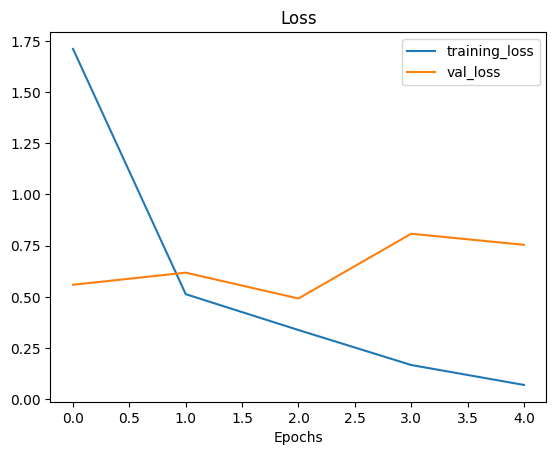

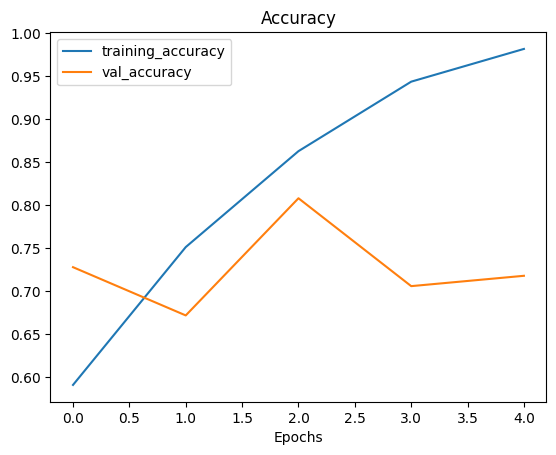

In [85]:
plot_loss_curves(history_4)

In [86]:
model_4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 253, 253, 10)      280       
                                                                 
 conv2d_30 (Conv2D)          (None, 251, 251, 32)      2912      
                                                                 
 conv2d_31 (Conv2D)          (None, 249, 249, 32)      9248      
                                                                 
 flatten_13 (Flatten)        (None, 1984032)           0         
                                                                 
 dense_23 (Dense)            (None, 1)                 1984033   
                                                                 
Total params: 1996473 (7.62 MB)
Trainable params: 1996473 (7.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Adjust Model Parameters

3 Steps to fit models
0. Make Baseline model
1. Beat the baseline by overfitting larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase conv filters
* Add dense layers

Reduce overfitting:
* Add data augmentation
* Add regularization layer(MaxPool2D)
* Add more data...

> MaxPool2D Finds the most Important parts of an image

In [88]:
# New Baseline
model_5= Sequential([
    Conv2D(10,3,activation='relu',input_shape=(255,255,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])


In [89]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [90]:
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 131ms/step - loss: 0.6510 - accuracy: 0.6273 - val_loss: 0.5710 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4905 - accuracy: 0.7707 - val_loss: 0.3600 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.4122 - accuracy: 0.8180 - val_loss: 0.3513 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3806 - accuracy: 0.8320 - val_loss: 0.3155 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3554 - accuracy: 0.8460 - val_loss: 0.3096 - val_accuracy: 0.8740


In [91]:
model_5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 253, 253, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 10)      

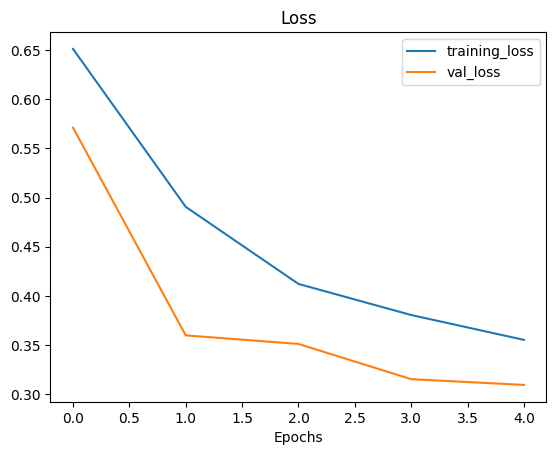

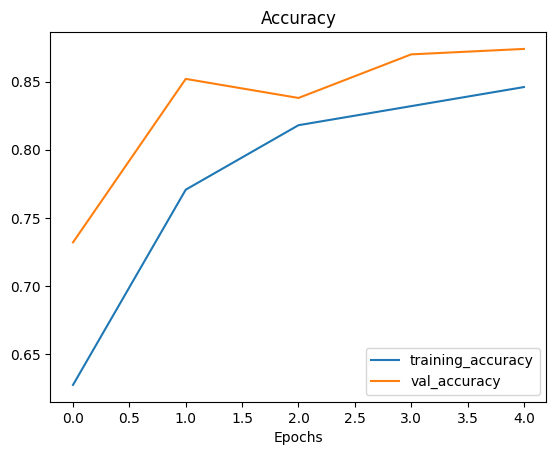

In [92]:
plot_loss_curves(history_5)